In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

#Comparativo vs Inflación - Tasas Promedio Crédito a la Vivienda:

In [2]:
url= 'http://bit.ly/3XjEqYT'

In [3]:
df= pd.read_csv(url, encoding= 'unicode_escape', header=10)

In [4]:
df.tail(5)

,TÃ­tulo,Tasa objetivo,"TIIE a 28 dÃ­as, Tasa de interÃ©s en por ciento anual",Tasa de interÃ©s promedio de crÃ©ditos en pesos a tasa fija,INPC
5601,07/08/2023,11.2500,11.5025,NaN,NaN
5602,08/08/2023,11.2500,11.5000,NaN,NaN
5603,09/08/2023,11.2500,11.4940,NaN,NaN
5604,10/08/2023,11.2500,11.5005,NaN,NaN
5605,11/08/2023,11.2500,11.4940,NaN,NaN


In [5]:
df.columns =['Fecha','T_Objetivo','TIIE_28', 'T_Promedio_CH', 'INPC']

In [6]:
df = df.drop(df.index[[0,1]])

In [7]:
df= df.drop(['T_Objetivo', 'TIIE_28'], axis=1)

In [8]:
df.head(5)

,Fecha,T_Promedio_CH,INPC
2,02/01/2008,12.22,65.3506
3,03/01/2008,12.22,65.3506
4,04/01/2008,12.22,65.3506
5,07/01/2008,12.22,65.3506
6,08/01/2008,12.22,65.3506


In [9]:
df = df.dropna()

In [10]:
df.Fecha = pd.to_datetime(df.Fecha, dayfirst=True)
df.set_index('Fecha', inplace = True)

In [11]:
df = df.resample('MS').agg('last')

In [12]:
df['InflacionAnual'] = (df['INPC'] / df['INPC'].shift(12)-1)*100

In [13]:
df = df.resample('Y').agg('last')

In [14]:
df

,T_Promedio_CH,INPC,InflacionAnual
Fecha,,,
2008-12-31,12.8,69.2956,NaN
2009-12-31,12.79,71.7719,3.573531
2010-12-31,12.29,74.9310,4.401583
2011-12-31,12.52,77.7924,3.818713
2012-12-31,12.13,80.5682,3.568215
2013-12-31,10.88,83.7701,3.974149
2014-12-31,10.75,87.1890,4.081289
2015-12-31,10.15,89.0468,2.130773
2016-12-31,10.65,92.0390,3.360256


In [15]:
df = df.reset_index()

In [16]:
df[['Fecha']] = df[['Fecha']].astype('str')

In [17]:
df['Fecha'] =df['Fecha'].str.extract('(\d+(?:\.\d+)?)')

In [18]:
df

,Fecha,T_Promedio_CH,INPC,InflacionAnual
0,2008,12.8,69.2956,NaN
1,2009,12.79,71.7719,3.573531
2,2010,12.29,74.9310,4.401583
3,2011,12.52,77.7924,3.818713
4,2012,12.13,80.5682,3.568215
5,2013,10.88,83.7701,3.974149
6,2014,10.75,87.1890,4.081289
7,2015,10.15,89.0468,2.130773
8,2016,10.65,92.0390,3.360256
9,2017,10.76,98.2729,6.773107


In [19]:
df = df.drop(['INPC'], axis=1)

In [20]:
df[['T_Promedio_CH']] = df[['T_Promedio_CH']].astype('float')

In [21]:
df = df.dropna()

In [22]:
df = df.reset_index()

In [23]:
df= df.drop(['index'], axis=1)

In [24]:
df

,Fecha,T_Promedio_CH,InflacionAnual
0,2009,12.79,3.573531
1,2010,12.29,4.401583
2,2011,12.52,3.818713
3,2012,12.13,3.568215
4,2013,10.88,3.974149
5,2014,10.75,4.081289
6,2015,10.15,2.130773
7,2016,10.65,3.360256
8,2017,10.76,6.773107
9,2018,10.59,4.830528


# Indice Nacional de Precios a la Vivienda

In [25]:
df1 = pd.read_excel('IndiceSHFNal.xlsx')

In [26]:
df1

,Q,Año,Trimestre,Global,Indice,%_Anual
0,1Q2006,2006,1,Nacional,52.09,7.468537
1,2Q2006,2006,2,Nacional,53.45,6.580259
2,3Q2006,2006,3,Nacional,54.26,6.183953
3,4Q2006,2006,4,Nacional,54.54,6.962149
4,1Q2007,2007,1,Nacional,55.97,7.448647
...,...,...,...,...,...,...
65,2Q2022,2022,2,Nacional,144.72,7.967771
66,3Q2022,2022,3,Nacional,149.21,9.423585
67,4Q2022,2022,4,Nacional,152.66,10.407174
68,1Q2023,2023,1,Nacional,157.59,11.678832


In [27]:
df1['cumsum_col'] = df1.groupby(['Año'])['Indice'].cumsum()

In [28]:
df1['cumcount_col'] = df1.groupby(['Año'])['Indice'].cumcount()

In [29]:
df1['cummean_col'] = (df1['cumsum_col'] / (df1['cumcount_col']+1))

In [30]:
df1['incremento_anual'] = (df1['cummean_col'].pct_change(periods=4))*100

In [31]:
df1 = df1.dropna()

In [32]:
criterio1 = df1[(df1['Año']<2023) & (df1['Trimestre']==4)]
criterio2 = df1[(df1['Año']==2023) & (df1['Trimestre']==2)]

In [33]:
df1 =pd.concat([criterio1, criterio2])

In [34]:
df1 = df1[(df1['Año']>2008)]

In [35]:
df1

,Q,Año,Trimestre,Global,Indice,%_Anual,cumsum_col,cumcount_col,cummean_col,incremento_anual
15,4Q2009,2009,4,Nacional,65.15,2.825126,259.62,3,64.9050,5.220070
19,4Q2010,2010,4,Nacional,68.02,4.405219,267.21,3,66.8025,2.923504
23,4Q2011,2011,4,Nacional,71.76,5.498383,282.71,3,70.6775,5.800681
27,4Q2012,2012,4,Nacional,73.75,2.773133,291.71,3,72.9275,3.183474
31,4Q2013,2013,4,Nacional,78.08,5.871186,306.65,3,76.6625,5.121525
35,4Q2014,2014,4,Nacional,81.08,3.842213,319.71,3,79.9275,4.258927
39,4Q2015,2015,4,Nacional,89.36,10.212136,345.76,3,86.4400,8.148009
43,4Q2016,2016,4,Nacional,94.61,5.875112,370.94,3,92.7350,7.282508
47,4Q2017,2017,4,Nacional,102.71,8.561463,400.00,3,100.0000,7.834151
51,4Q2018,2018,4,Nacional,112.28,9.317496,435.49,3,108.8725,8.872500


In [36]:
df_anual = df1.drop(['%_Anual','Global', 'Q', 'Trimestre', 'cumsum_col', 'cumcount_col', 'cummean_col'], axis=1)

In [37]:
df_anual

,Año,Indice,incremento_anual
15,2009,65.15,5.220070
19,2010,68.02,2.923504
23,2011,71.76,5.800681
27,2012,73.75,3.183474
31,2013,78.08,5.121525
35,2014,81.08,4.258927
39,2015,89.36,8.148009
43,2016,94.61,7.282508
47,2017,102.71,7.834151
51,2018,112.28,8.872500


In [38]:
df2 = df_anual.copy()

In [39]:
df2 = df2.reset_index()

In [40]:
df2= df2.drop(['index'], axis=1)

In [41]:
df2

,Año,Indice,incremento_anual
0,2009,65.15,5.220070
1,2010,68.02,2.923504
2,2011,71.76,5.800681
3,2012,73.75,3.183474
4,2013,78.08,5.121525
5,2014,81.08,4.258927
6,2015,89.36,8.148009
7,2016,94.61,7.282508
8,2017,102.71,7.834151
9,2018,112.28,8.872500


In [42]:
base = df.join(df2, how="inner")

In [43]:
base.tail()

,Fecha,T_Promedio_CH,InflacionAnual,Año,Indice,incremento_anual
10,2019,10.35,2.828577,2019,120.88,8.565065
11,2020,10.35,3.150075,2020,127.45,5.812306
12,2021,10.13,7.355108,2021,138.27,7.869750
13,2022,11.57,7.817029,2022,152.66,8.905937
14,2023,11.33,5.055554,2023,161.41,11.604800


In [44]:
base= base.drop(['Año', 'Indice'], axis=1)

In [45]:
base.head(5)

,Fecha,T_Promedio_CH,InflacionAnual,incremento_anual
0,2009,12.79,3.573531,5.220070
1,2010,12.29,4.401583,2.923504
2,2011,12.52,3.818713,5.800681
3,2012,12.13,3.568215,3.183474
4,2013,10.88,3.974149,5.121525


In [46]:
base.columns =['Año','TPCV','Inflacion','INPV']

In [47]:
base = base.set_index('Año')

In [48]:
base

,TPCV,Inflacion,INPV
Año,,,
2009,12.79,3.573531,5.220070
2010,12.29,4.401583,2.923504
2011,12.52,3.818713,5.800681
2012,12.13,3.568215,3.183474
2013,10.88,3.974149,5.121525
2014,10.75,4.081289,4.258927
2015,10.15,2.130773,8.148009
2016,10.65,3.360256,7.282508
2017,10.76,6.773107,7.834151


In [49]:
valor_2023 = base['INPV'].iloc[-1]

In [50]:
valor_2023

11.604800055977304

In [51]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2009 to 2023
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TPCV       15 non-null     float64
 1   Inflacion  15 non-null     float64
 2   INPV       15 non-null     float64
dtypes: float64(3)
memory usage: 480.0+ bytes


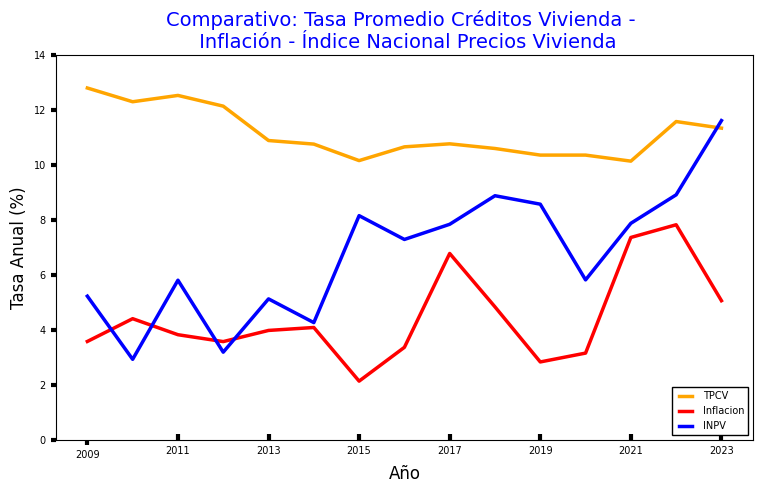

In [52]:
fig, ax=plt.subplots(figsize=(9,5))
style.use('classic')

base['TPCV'].plot(ax=ax, color='orange', linestyle= '-', linewidth='2.5')
base['Inflacion'].plot(ax=ax, color='red', linestyle= '-', linewidth= '2.5')
base['INPV'].plot(ax=ax, color='blue', linestyle= '-', linewidth='2.5')

ax.set_title('Comparativo: Tasa Promedio Créditos Vivienda - \n Inflación - Índice Nacional Precios Vivienda',fontsize= 14, color='blue')

ax.set_xlabel('Año', fontsize= 12, color='black')

ax.tick_params(labelsize='medium', width=3)
ax.set_ylabel('Tasa Anual (%)', fontsize= 12, color='black')
ax.legend(loc="lower right", fontsize=7)

plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

plt.show()

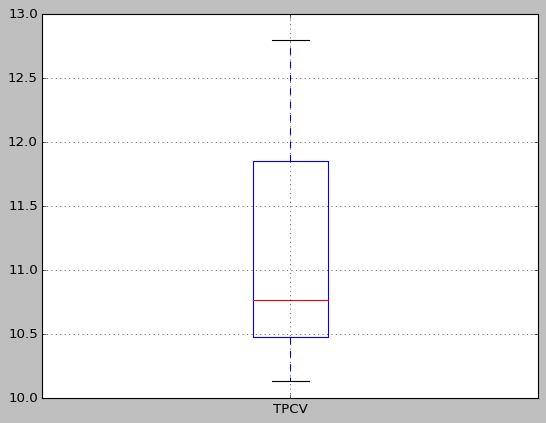

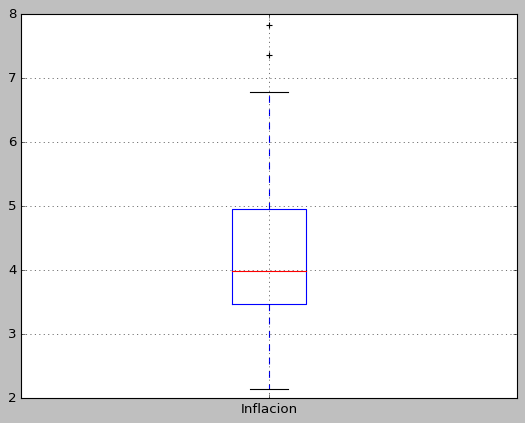

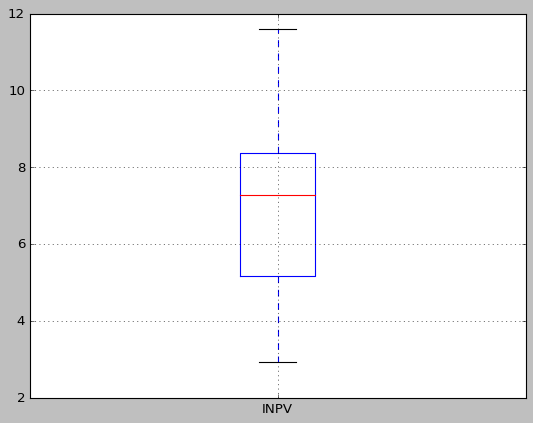

In [53]:
for column in base:
  plt.figure()
  base.boxplot([column])

<Axes: >

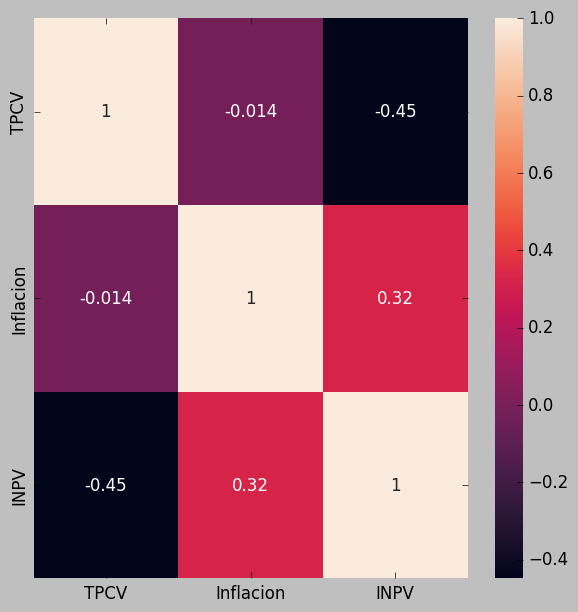

In [54]:
import seaborn as sns
plt.figure(figsize=(7,7), dpi=100)
sns.heatmap(base.corr(),annot= True)